# Yaw System Analysis
The yaw system in a wind turbine is a mechanism that rotates the nacelle and rotor horizontally to face the wind direction. Its main purposes are:

1. Maximize energy production by aligning the rotor perpendicular to the wind
2. Reduce structural stress on the turbine
3. Protect the turbine from damage in extreme conditions

Key components include:

- Yaw drive (motors)
- Yaw bearing
- Yaw brake
- Wind vane and anemometer
- Control system

The system operates by constantly measuring wind direction and adjusting the nacelle's position when misalignment exceeds a set threshold. This process ensures optimal turbine performance and longevity.

Most large turbines use active yaw systems with motors, while some smaller ones may use passive (free) yaw systems. The main challenge is balancing responsiveness with component wear and adapting to changing wind conditions.

In [ ]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.stats import circcorrcoef

sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import gdown

file_id = "1etSrCCnbtS2gZt3ObYp6y9z-K1NgQdyN"
output_file = "Status_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

file_id = "1rxrYDeNKAErHxAa3YMVqoFwPpbyL_Elt"
output_file = "Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file)

Downloading...
From: https://drive.google.com/uc?id=1etSrCCnbtS2gZt3ObYp6y9z-K1NgQdyN
To: /content/Status_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv
100%|██████████| 1.02M/1.02M [00:00<00:00, 113MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1rxrYDeNKAErHxAa3YMVqoFwPpbyL_Elt
From (redirected): https://drive.google.com/uc?id=1rxrYDeNKAErHxAa3YMVqoFwPpbyL_Elt&confirm=t&uuid=7c17558e-f00b-476e-9e28-3a7eef9bf25d
To: /content/Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv
100%|██████████| 212M/212M [00:02<00:00, 93.9MB/s]


'Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv'

Data used in the analysis is from [Kelmarsh wind farm data](https://zenodo.org/records/8252025) Turbine 2 in the year 2022, released by Cubico Sustainable Investments Ltd under a CC-BY-4.0 open data license, provides comprehensive information about a UK-based wind farm.

It includes geographical data, static turbine details, and extensive operational data from six Senvion MM92 turbines spanning from 2016 to 2022. The dataset features 10-minute SCADA and events data, substation/PMU meter data, and fiscal/grid meter data where available. This valuable resource is designed to support various analyses in the renewable energy sector, including performance optimization and integration with other datasets. The creators encourage feedback, usage reports, and inquiries about additional data, aiming to promote data sharing initiatives within the renewables industry.



In [ ]:
stt_k2 = pd.read_csv("/content/Status_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv", skiprows=9)
scada_k2 = pd.read_csv("/content/Turbine_Data_Kelmarsh_2_2022-01-01_-_2023-01-01_229.csv", skiprows=9).rename(columns={"# Date and time": "Date and time"})

features = ["Date and time", "Wind speed (m/s)", "Wind direction (°)", "Nacelle position (°)",
            "Power (kW)", "Yaw bearing angle (°)", "Vane position 1+2 (°)"]
df = scada_k2[features]

To analyze the effectiveness of the yaw system, we should focus on the following key features from the dataset:

1. Wind direction (°)
2. Nacelle position (°)
3. Vane position 1+2 (°)
4. Power (kW)
5. Wind speed (m/s)

The most important relationship to examine is between wind direction and nacelle position. An effective yaw system should minimize the difference between these two values. We can create a new feature called "yaw error" by calculating the absolute difference between wind direction and nacelle position.

In [ ]:
df.describe()

,Wind speed (m/s),Wind direction (°),Nacelle position (°),Power (kW),Yaw bearing angle (°),Vane position 1+2 (°)
count,52488.000000,52488.000000,52488.000000,52488.000000,52445.000000,52445.000000
mean,6.343382,203.803825,203.792775,645.356335,203.761256,0.189614
std,2.763370,89.301500,89.306714,629.890774,89.341249,15.546426
min,0.000000,0.005065,0.017307,-17.639272,0.017307,-172.789430
25%,4.344982,155.824596,158.288818,109.079250,158.288818,-5.028010
50%,6.248294,215.534093,216.458221,451.115952,216.274679,-0.179123
75%,8.064383,267.111972,268.043823,1027.502132,268.044281,4.978306
max,22.701469,359.999159,359.962881,2079.629993,359.940379,177.850699


## 1. Calculate yaw error: abs(Wind direction - Nacelle position)

In [ ]:
df['yaw_error'] = abs(df['Wind direction (°)'] - df['Nacelle position (°)'])

# Print summary of the data
print("Summary of the data:")
print(df[['Wind speed (m/s)', 'Wind direction (°)', 'Nacelle position (°)', 'Power (kW)']].describe())

Summary of the data:
       Wind speed (m/s)  Wind direction (°)  Nacelle position (°)  \
count      52488.000000        52488.000000          52488.000000   
mean           6.343382          203.803825            203.792775   
std            2.763370           89.301500             89.306714   
min            0.000000            0.005065              0.017307   
25%            4.344982          155.824596            158.288818   
50%            6.248294          215.534093            216.458221   
75%            8.064383          267.111972            268.043823   
max           22.701469          359.999159            359.962881   

         Power (kW)  
count  52488.000000  
mean     645.356335  
std      629.890774  
min      -17.639272  
25%      109.079250  
50%      451.115952  
75%     1027.502132  
max     2079.629993  


## 2. Analyze the relationship between yaw error and power output. Smaller yaw errors should correlate with higher power output for a given wind speed.

In [ ]:
# Create bins for wind speed
df['wind_speed_bin'] = pd.cut(df['Wind speed (m/s)'].dropna(), bins=5)

# Function to plot yaw error vs power for a given wind speed bin
def plot_yaw_error_vs_power(wind_speed_bin):
    data = df[df['wind_speed_bin'] == wind_speed_bin]

    if data.empty:
        # print(f"No data for wind speed bin: {wind_speed_bin}")
        return

    plt.figure(figsize=(10, 6))
    plt.scatter(data['yaw_error'], data['Power (kW)'], alpha=0.5)
    plt.xlabel('Yaw Error (degrees)')
    plt.ylabel('Power Output (kW)')
    plt.title(f'Yaw Error vs Power Output for Wind Speed {wind_speed_bin}')

    # Add trend line if there's enough data
    if len(data) > 1:
        try:
            z = np.polyfit(data['yaw_error'], data['Power (kW)'], 1)
            p = np.poly1d(z)
            plt.plot(data['yaw_error'], p(data['yaw_error']), "r--", alpha=0.8)
        except np.linalg.LinAlgError:
            print(f"Couldn't fit trend line for wind speed bin: {wind_speed_bin}")

    plt.show()

In [ ]:
print("\nNumber of records in each wind speed bin:")
print(df['wind_speed_bin'].value_counts().sort_index())


Number of records in each wind speed bin:
wind_speed_bin
(-0.0227, 4.54]     14277
(4.54, 9.081]       30084
(9.081, 13.621]      7571
(13.621, 18.161]      503
(18.161, 22.701]       53
Name: count, dtype: int64


1. Wind Speed Distribution:
    - The average wind speed is 6.34 m/s, with a standard deviation of 2.76 m/s.
    - The wind speeds range from 0 to 22.7 m/s, with 50% of the data falling between 4.34 and 8.06 m/s.
    - Most of the data (30,084 records) falls in the 4.54-9.081 m/s range, which is typical for many wind farm locations.
2. Wind Direction and Nacelle Position:
    - The mean wind direction (203.8°) and mean nacelle position (203.79°) are very close, indicating that on average, the yaw system is working well.
    - Both wind direction and nacelle position have a standard deviation of about 89°, suggesting a wide range of wind directions.
3. Power Output:
    - The average power output is 645.36 kW, with a standard deviation of 629.89 kW.
    - There are some negative power values (min: -17.64 kW), which could indicate periods when the turbine is consuming power rather than generating it.

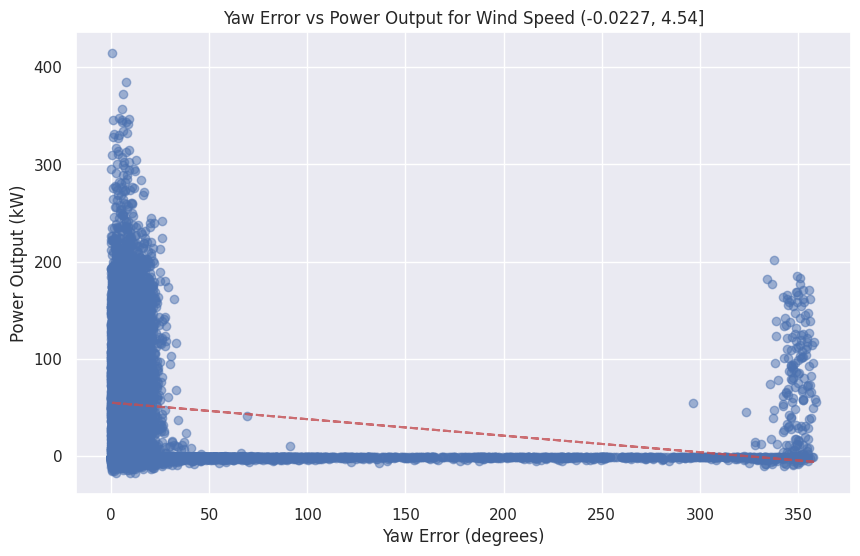

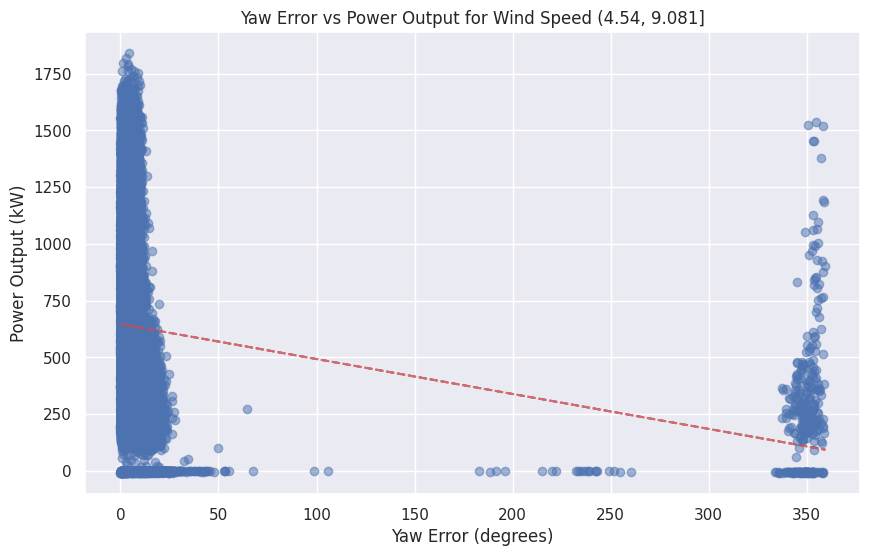

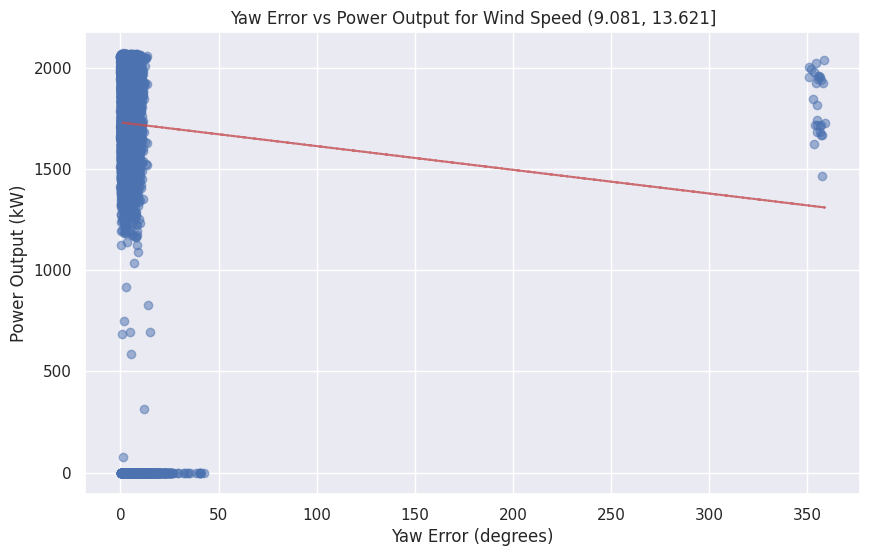

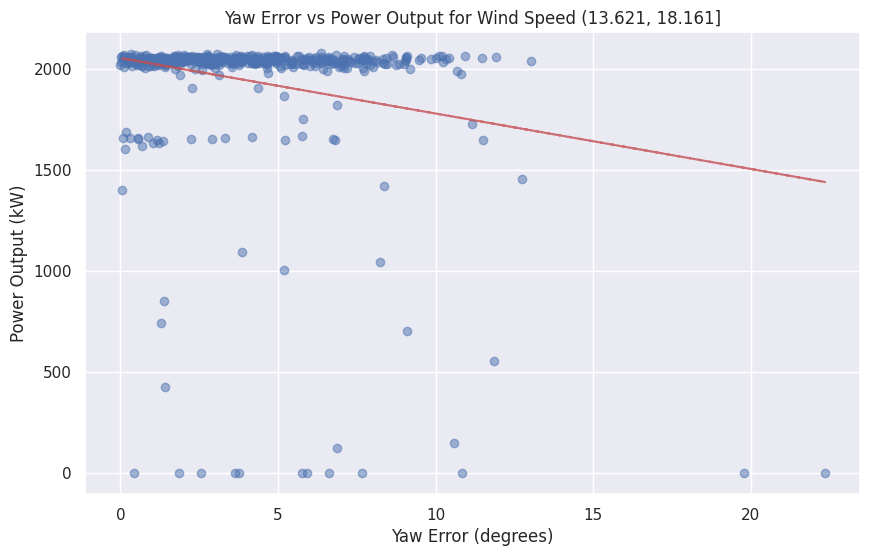

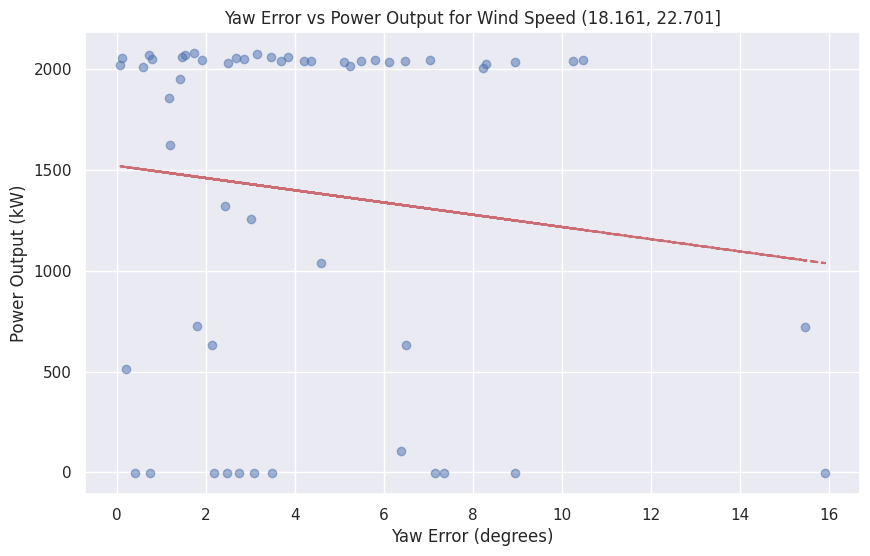

In [ ]:
# Plot for each wind speed bin
for wind_speed_bin in df['wind_speed_bin'].unique().sort_values():
    plot_yaw_error_vs_power(wind_speed_bin)

In [ ]:
# Calculate correlation between yaw error and power output for each wind speed bin
correlations = df.groupby('wind_speed_bin').apply(lambda x: x['yaw_error'].corr(x['Power (kW)']) if len(x) > 1 else np.nan)
print("\nCorrelations between yaw error and power output for each wind speed bin:")
print(correlations)


Correlations between yaw error and power output for each wind speed bin:
wind_speed_bin
(-0.0227, 4.54]    -0.171896
(4.54, 9.081]      -0.141378
(9.081, 13.621]    -0.056021
(13.621, 18.161]   -0.215960
(18.161, 22.701]   -0.124924
dtype: float64


4. Yaw Error vs Power Output Correlation:
    - All wind speed bins show negative correlations between yaw error and power output, which is expected. This means that as yaw error increases, power output tends to decrease.
    - The strongest negative correlation (-0.216) is in the 13.621-18.161 m/s bin, suggesting that yaw alignment is particularly important at higher wind speeds.
    - The weakest correlation (-0.056) is in the 9.081-13.621 m/s bin, which is somewhat unexpected and might warrant further investigation.

In [ ]:
# Calculate average power output for different yaw error ranges
df['yaw_error_bin'] = pd.cut(df['yaw_error'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])
avg_power = df.groupby(['wind_speed_bin', 'yaw_error_bin'])['Power (kW)'].mean().unstack()
print("\nAverage power output (kW) for different yaw error ranges and wind speed bins:")
print(avg_power)


Average power output (kW) for different yaw error ranges and wind speed bins:
yaw_error_bin             0-5         5-10        10-15       15-20  \
wind_speed_bin                                                        
(-0.0227, 4.54]     61.157509    62.343738    61.013306   48.729489   
(4.54, 9.081]      732.332862   614.411962   337.519124  253.961078   
(9.081, 13.621]   1778.079719  1739.384659  1122.241699   -1.584829   
(13.621, 18.161]  1981.354012  1919.457604  1646.706420   -3.235144   
(18.161, 22.701]  1406.280518  1403.510705  2043.629779  358.484489   

yaw_error_bin            20+  
wind_speed_bin                
(-0.0227, 4.54]    10.736584  
(4.54, 9.081]     191.214527  
(9.081, 13.621]   567.024685  
(13.621, 18.161]   -3.203668  
(18.161, 22.701]         NaN  


5. Average Power Output for Different Yaw Error Ranges:
    - For low wind speeds (-0.0227, 4.54 m/s), yaw error doesn't seem to have a significant impact on power output.
    - For medium wind speeds (4.54-9.081 m/s), there's a clear trend of decreasing power output as yaw error increases.
    - For high wind speeds (9.081-13.621 m/s and above), the impact of yaw error is most pronounced:
        - Power output is highest for yaw errors 0-5°
        - There's a significant drop in power output for yaw errors above 10°
        - Some negative power values for large yaw errors at high wind speeds might indicate emergency shutdowns or other issues.

### Conclusions and Recommendations:

1. The yaw system appears to be working well on average, but there's room for improvement, especially at higher wind speeds.
2. Focus on minimizing yaw errors, particularly when wind speeds are above 9 m/s, as this is where the largest power losses occur.
3. Investigate the causes of large yaw errors (>15°) at high wind speeds, as these lead to significant power losses and potential turbine shutdowns.
4. The weaker correlation in the 9.081-13.621 m/s bin is unexpected and might indicate other factors affecting power output in this range. This deserves further investigation.
5. Consider implementing a more aggressive yaw control strategy for wind speeds above 9 m/s to keep yaw errors below 5°.
6. Analyze the periods of negative power output to ensure they're not due to yaw system malfunctions.

## 3. Look at the standard deviation of nacelle position and wind direction to understand how stable these measurements are.

In [ ]:
# Calculate and plot rolling standard deviation
window_size = 6  # 1 hour if data is 10-minute intervals
df['wind_dir_rolling_std'] = df['Wind direction (°)'].rolling(window=window_size).std()
df['nacelle_pos_rolling_std'] = df['Nacelle position (°)'].rolling(window=window_size).std()

In [ ]:
# Print overall standard deviation
print("\nOverall Standard Deviation:")
print(f"Wind Direction: {df['Wind direction (°)'].std():.2f} degrees")
print(f"Nacelle Position: {df['Nacelle position (°)'].std():.2f} degrees")


Overall Standard Deviation:
Wind Direction: 89.30 degrees
Nacelle Position: 89.31 degrees


1. Overall Standard Deviation:
Wind Direction: 89.30 degrees
Nacelle Position: 89.31 degrees
    
    Analysis:
    
    - The standard deviations for both wind direction and nacelle position are almost identical, which is a good sign.
    - This suggests that the nacelle position is tracking the wind direction very closely over the long term.
    - However, the high value (89.30-89.31 degrees) indicates a wide range of wind directions and nacelle positions, which is typical for a wind turbine exposed to varying wind conditions.

In [ ]:
# Calculate correlation between wind direction and nacelle position
correlation = df['Wind direction (°)'].corr(df['Nacelle position (°)'])
print(f"\nCorrelation between Wind Direction and Nacelle Position: {correlation:.4f}")


Correlation between Wind Direction and Nacelle Position: 0.8696


2. Correlation between Wind Direction and Nacelle Position: 0.8696
    
    Analysis:
    
    - This is a strong positive correlation, indicating that the nacelle position closely follows changes in wind direction.
    - A correlation of 0.8696 suggests that about 75.6% (0.8696^2 * 100) of the variation in nacelle position can be explained by changes in wind direction.
    - This high correlation is a good indicator that the yaw system is functioning well overall.

In [ ]:
# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(df['Wind direction (°)'].dropna(), df['Nacelle position (°)'].dropna())
print(f"\nPaired t-test results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")


Paired t-test results:
t-statistic: 0.0555
p-value: 0.9557


Paired t-test results:
t-statistic: 0.0555
p-value: 0.9557

Analysis:

1. T-statistic:
The t-statistic of 0.0555 is very close to zero. This indicates that there is a very small difference between the means of the wind direction and nacelle position.
2. P-value:
The p-value of 0.9557 is much larger than the conventional significance level of 0.05. This high p-value suggests that the difference between wind direction and nacelle position is not statistically significant.

Interpretation:

1. The extremely small t-statistic and very high p-value provide strong evidence that there is no significant difference between the wind direction and nacelle position.
2. This result strongly supports the conclusion that the yaw system is performing exceptionally well. The nacelle position is tracking the wind direction so closely that any differences between them are likely due to random variation rather than systematic error or lag in the yaw system.
3. Combined with the previous findings (high correlation and similar standard deviations), this t-test result further confirms that the yaw system is highly effective in aligning the nacelle with the wind direction.

### Conclusion
Given these results, we can conclude:

1. The yaw system appears to be performing well overall, as evidenced by the very similar standard deviations and high correlation between wind direction and nacelle position.
2. The nacelle is tracking wind direction changes closely, which is crucial for optimal power generation.
3. The high standard deviation in both wind direction and nacelle position (about 89 degrees) suggests a wide range of wind conditions at the site. This is not unusual but emphasizes the importance of an effective yaw system.
4. The yaw system is performing its function very effectively, keeping the nacelle aligned with the wind direction with high precision.
5. Any differences between wind direction and nacelle position are likely to be minimal and not statistically significant.
6. The system appears to be responding quickly and accurately to changes in wind direction.

## 4. Examine the relationship between vane position and wind direction to ensure the wind vane is accurately measuring wind direction.

Circular Correlation between Wind Direction and Vane Position: 0.0445
Mean Absolute Error between Wind Direction and Vane Position: 102.34 degrees


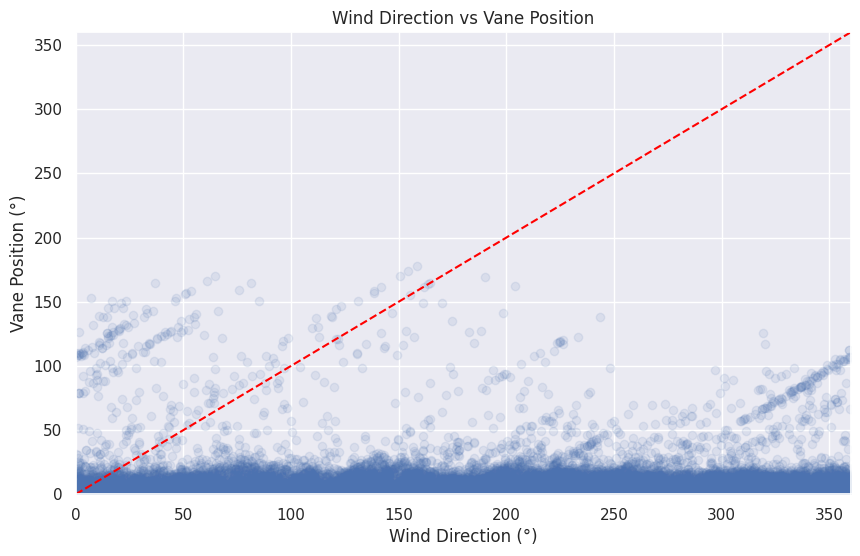

In [ ]:
# 4. Examine the relationship between vane position and wind direction
wind_dir_rad = np.deg2rad(df['Wind direction (°)'])
vane_pos_rad = np.deg2rad(df['Vane position 1+2 (°)'])

# Calculate circular correlation
circ_corr = circcorrcoef(wind_dir_rad, vane_pos_rad)

# Calculate angular difference
angular_diff = np.abs(np.rad2deg(np.arctan2(
    np.sin(wind_dir_rad - vane_pos_rad),
    np.cos(wind_dir_rad - vane_pos_rad)
)))

# Calculate mean absolute error
mae = np.mean(angular_diff)

print(f"Circular Correlation between Wind Direction and Vane Position: {circ_corr:.4f}")
print(f"Mean Absolute Error between Wind Direction and Vane Position: {mae:.2f} degrees")

# Plot wind direction vs vane position
plt.figure(figsize=(10, 6))
plt.scatter(df['Wind direction (°)'], df['Vane position 1+2 (°)'], alpha=0.1)
plt.xlabel('Wind Direction (°)')
plt.ylabel('Vane Position (°)')
plt.title('Wind Direction vs Vane Position')
plt.plot([0, 360], [0, 360], color='red', linestyle='--')  # Perfect alignment line
plt.xlim(0, 360)
plt.ylim(0, 360)
plt.show()

Circular Correlation between Wind Direction and Vane Position: 0.0445

Mean Absolute Error between Wind Direction and Vane Position: 102.34 degrees

Scatter Plot Analysis:

1. Correlation:
The circular correlation of 0.0445 is very close to zero, indicating an extremely weak relationship between wind direction and vane position. In a well-functioning system, we would expect this value to be much closer to 1, signifying strong alignment between wind direction and vane position.
2. Mean Absolute Error:
A mean absolute error of 102.34 degrees is very high. This suggests that, on average, the vane position differs from the wind direction by more than a quarter of a full rotation. In an effective system, we would expect this error to be much lower, ideally less than 10-15 degrees.
3. Scatter Plot Observations:
- There's no clear diagonal trend from bottom-left to top-right, which would indicate agreement between wind direction and vane position.
- A dense horizontal band of points is visible near the bottom of the plot (vane positions around 0-50 degrees).
- A less dense horizontal band appears near the middle-top of the plot (vane positions around 150-180 degrees).
- Several diagonal lines of points are visible across the plot.
- The points do not cluster around the red dashed line, which represents perfect alignment.

Interpretation:

1. Weak Correlation: The near-zero correlation suggests that the vane position is not tracking the wind direction effectively. This could indicate a serious problem with the wind vane sensor or its data processing system.
2. Large Average Error: The high mean absolute error confirms that the vane position is frequently very far from the actual wind direction. This level of misalignment would likely significantly impact the turbine's efficiency and performance.
3. Systematic Patterns: The distinct patterns in the scatter plot (horizontal bands and diagonal lines) suggest systematic issues rather than random errors. This could be due to:
    - Limitations in the vane's physical movement
    - Errors in sensor readings or data processing
    - Miscalibration of the vane position sensor
    - Potential software issues in recording or interpreting vane position data
4. Limited Range: The vane position appears to be limited to certain ranges, particularly favoring lower angles. This is not expected behavior for a fully functional wind vane, which should be able to indicate all directions equally.

### Conclusions:

1. The wind vane system is not functioning as expected. The data shows little to no meaningful relationship between wind direction and vane position.
2. There appear to be systematic issues affecting the vane position readings or their interpretation.
3. The current state of the wind vane data makes it unreliable for accurately determining wind direction or for use in controlling the turbine's yaw system.


## 5. Consider the impact of wind speed on yaw system performance, as higher wind speeds may require faster yaw responses.

In [ ]:
# Calculate yaw error (use circular difference)
df['yaw_error'] = np.abs(np.rad2deg(np.arctan2(
    np.sin(np.deg2rad(df['Wind direction (°)']) - np.deg2rad(df['Nacelle position (°)'])),
    np.cos(np.deg2rad(df['Wind direction (°)']) - np.deg2rad(df['Nacelle position (°)']))
)))

# Create wind speed bins
df['wind_speed_bin'] = pd.cut(df['Wind speed (m/s)'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])

# Calculate average yaw error for each wind speed bin
avg_yaw_error = df.groupby('wind_speed_bin')['yaw_error'].mean()
print("\nAverage Yaw Error by Wind Speed Bin:")
print(avg_yaw_error)


Average Yaw Error by Wind Speed Bin:
wind_speed_bin
0-5      15.463686
5-10      5.185098
10-15     4.000116
15-20     4.220018
20+       4.931764
Name: yaw_error, dtype: float64


Average Yaw Error by Wind Speed Bin:

0-5 m/s:   15.46 degrees

5-10 m/s:   5.19 degrees

10-15 m/s:  4.00 degrees

15-20 m/s:  4.22 degrees

20+ m/s:    4.93 degrees

Analysis:

- The yaw error is highest at low wind speeds (0-5 m/s), with an average error of 15.46 degrees.
- There's a significant improvement in yaw accuracy as wind speed increases, with the error dropping to 5.19 degrees in the 5-10 m/s range.
- The yaw system performs best in the 10-15 m/s range, with the lowest average error of 4.00 degrees.
- Performance remains relatively consistent for wind speeds above 10 m/s, with only slight variations in yaw error.
- There's a small increase in yaw error for very high wind speeds (20+ m/s).

Interpretation:

- The yaw system struggles most at low wind speeds, possibly due to more variable wind directions or less aggressive yaw control when power production is low.
- The system performs well at medium to high wind speeds, maintaining a relatively low yaw error.
- The slight increase in yaw error at very high wind speeds could be due to more challenging control conditions or safety considerations.

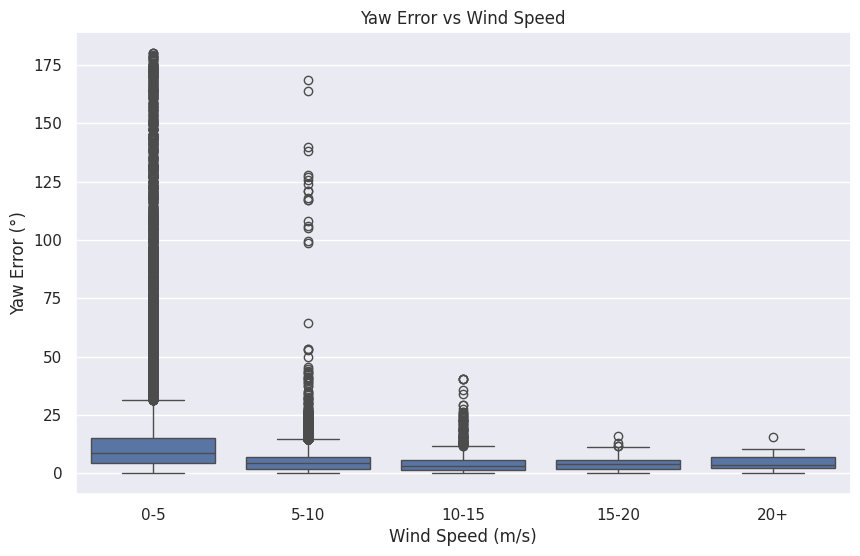

In [ ]:
# Plot boxplot of yaw error vs wind speed bin
plt.figure(figsize=(10, 6))
sns.boxplot(x='wind_speed_bin', y='yaw_error', data=df)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Yaw Error (°)')
plt.title('Yaw Error vs Wind Speed')
plt.show()


Correlation between Wind Speed and Yaw Rate: -0.0659


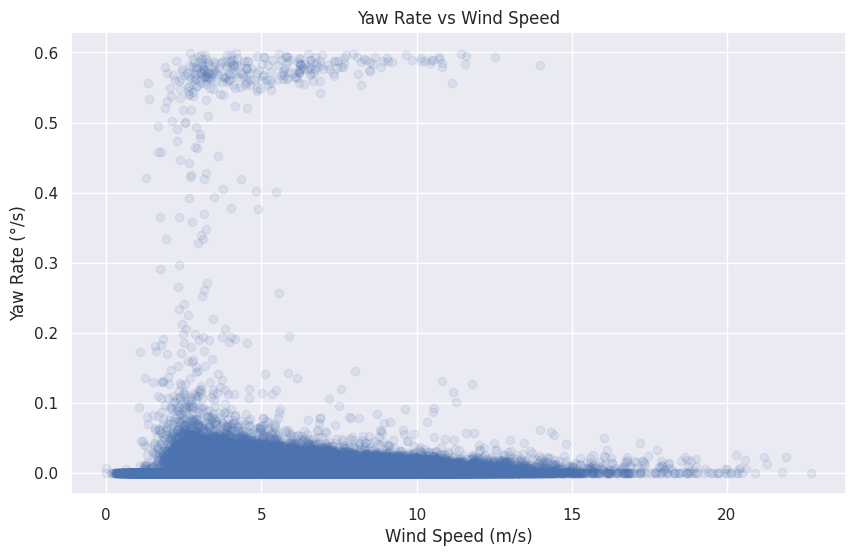

In [ ]:
df['Date and time'] = pd.to_datetime(df['Date and time'])
# Calculate yaw rate (change in nacelle position)
df['yaw_rate'] = df['Nacelle position (°)'].dropna().diff().abs() / df['Date and time'].dropna().diff().dt.total_seconds()

# Calculate correlation between wind speed and yaw rate
speed_rate_corr = df['Wind speed (m/s)'].corr(df['yaw_rate'])
print(f"\nCorrelation between Wind Speed and Yaw Rate: {speed_rate_corr:.4f}")

# Plot scatter of yaw rate vs wind speed
plt.figure(figsize=(10, 6))
plt.scatter(df['Wind speed (m/s)'], df['yaw_rate'], alpha=0.1)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Yaw Rate (°/s)')
plt.title('Yaw Rate vs Wind Speed')
plt.show()

Correlation between Wind Speed and Yaw Rate: -0.0659

Analysis:

- This very weak negative correlation suggests that there's almost no linear relationship between wind speed and yaw rate.
- The negative sign indicates a slight tendency for yaw rate to decrease as wind speed increases, but the effect is minimal.

Yaw Rate vs Wind Speed Scatter Plot:

Analysis:

- The plot shows a dense concentration of points at lower wind speeds and lower yaw rates.
- There's a noticeable vertical spread of yaw rates at lower wind speeds, particularly below 5 m/s.
- As wind speed increases, the spread of yaw rates generally decreases, with fewer high yaw rate values.
- There appears to be an upper limit to the yaw rate, with very few points above 0.4 degrees/second.

Interpretation:

- The yaw system appears to be more active (higher yaw rates) at lower wind speeds, possibly due to more variable wind directions in these conditions.
- At higher wind speeds, the yaw rate tends to be lower and more consistent, which could indicate more stable wind directions or a more conservative yaw control strategy.
- The upper limit on yaw rate suggests there may be mechanical or control system limitations on how quickly the turbine can yaw.